# Jayveersinh Raj
# BS20-DS-01
# j.raj@innopolis.university

# Installations

In [1]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 6.3 MB/s eta 0:00:00


# Task 1

## Reading data

In [2]:
import pandas as pd
df = pd.read_excel("/content/us_macro_quarterly1.xlsx")
df

,freq,GDPC1,JAPAN_IP,PCED,CPI
0,1955-01-01,2683.766,NaN,15.755,26.793333
1,1955-04-01,2727.452,NaN,15.771,26.756667
2,1955-07-01,2764.128,NaN,15.834,26.776667
3,1955-10-01,2780.762,NaN,15.878,26.856667
4,1956-01-01,2770.032,NaN,15.943,26.860000
...,...,...,...,...,...
247,2016-10-01,16851.420,99.125073,111.583,242.177333
248,2017-01-01,16903.240,99.291726,112.198,243.949000
249,2017-04-01,17031.085,101.324890,112.273,244.010000
250,2017-07-01,17163.894,101.724856,112.699,245.296667


## a. i.

In [3]:
import numpy as np
# Computing the inflation rate
df['Inf'] = 400 * (np.log(df['PCED']) - np.log(df['PCED'].shift(1)))
df['Inf']

0           NaN
1      0.406014
2      1.594686
3      1.109991
4      1.634143
         ...   
247    1.972899
248    2.198584
249    0.267295
250    1.514857
251    2.684871
Name: Inf, Length: 252, dtype: float64

## Units of Inf
### The units of Inf (the inflation rate) are not in dollars or absolute values. Instead, since the calculation involves the natural logarithm of ratios of price indices, the result is a dimensionless number. Multiplying by 400 converts this number into an annualized percentage. Therefore, Inf is measured in percentage per year.

## a. ii.

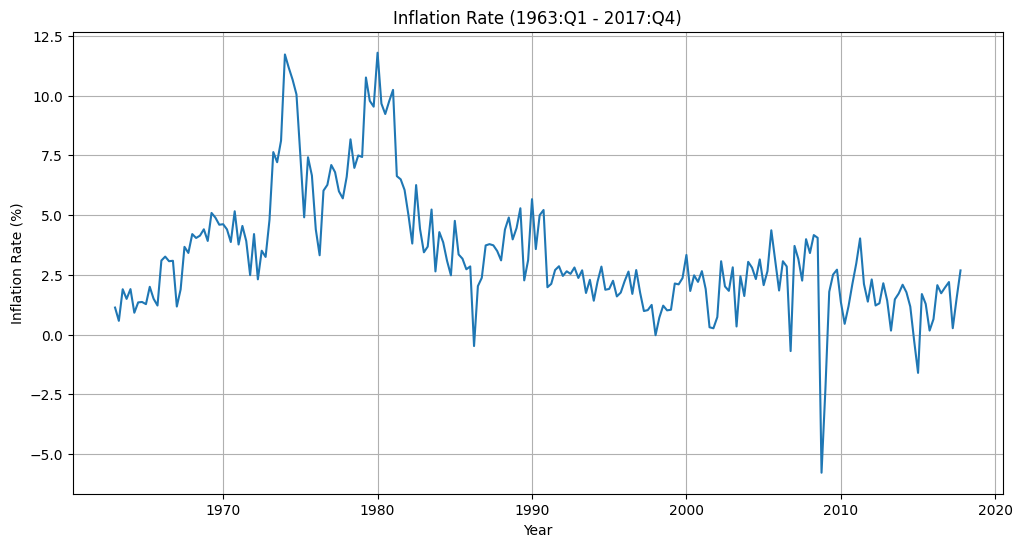

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Filtering the df for the period 1963:Q1 to 2017:Q4
df_filtered = df[(df['freq'] >= '1963-01-01') & (df['freq'] <= '2017-12-31')]

# Plotting the inflation rate for the specified period
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['freq'], df_filtered['Inf'])
plt.title('Inflation Rate (1963:Q1 - 2017:Q4)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()

## Analysis of Stochastic Trend
### When analyzing the plot for a stochastic trend, we look for certain characteristics:

### **1. Variability:** Does the series display significant fluctuations over time?
### **2. Lack of a Persistent Pattern:** Is there a clear, long-term directional trend, or does the series lack predictability?
### **3. Random Walk Characteristics:** Does the series appear to move in random steps, both upwards and downwards, without a clear direction?

### In the qbove plot, the inflation rate seems to exhibit fluctuations over the years. However, without a statistical test, it's challenging to definitively conclude the presence of a stochastic trend. Based on visual inspection, the series does show variability and lacks a consistent long-term trend, which might suggest a stochastic trend. The series does not consistently move in one direction and seems to vary randomly over time, which is indicative of a stochastic trend.

## b. i.

In [5]:
from statsmodels.tsa.stattools import acf

# Computing the first difference of the inflation rate
df_filtered['Delta_Inf'] = df_filtered['Inf'].diff()

# Computing the first four autocorrelations
autocorrelations = acf(df_filtered['Delta_Inf'].dropna(), nlags=4)

# Displaying the first four autocorrelations
print(f"First 4 autocorrelations: {autocorrelations}\n\n")

First 4 autocorrelations: [ 1.         -0.24604717 -0.20336346  0.1361411  -0.08493569]




<ipython-input-5-0b1adf2c086d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Delta_Inf'] = df_filtered['Inf'].diff()


## The first four autocorrelations of  ΔInf (the change in inflation rate) are as follows:

### 1. Lag 0 (itself): 1.00
### 2. Lag 1: -0.246
### 3. Lag 2: -0.203
### 4. Lag 3: 0.136
### 5. Lag 4: -0.085

## b. ii.

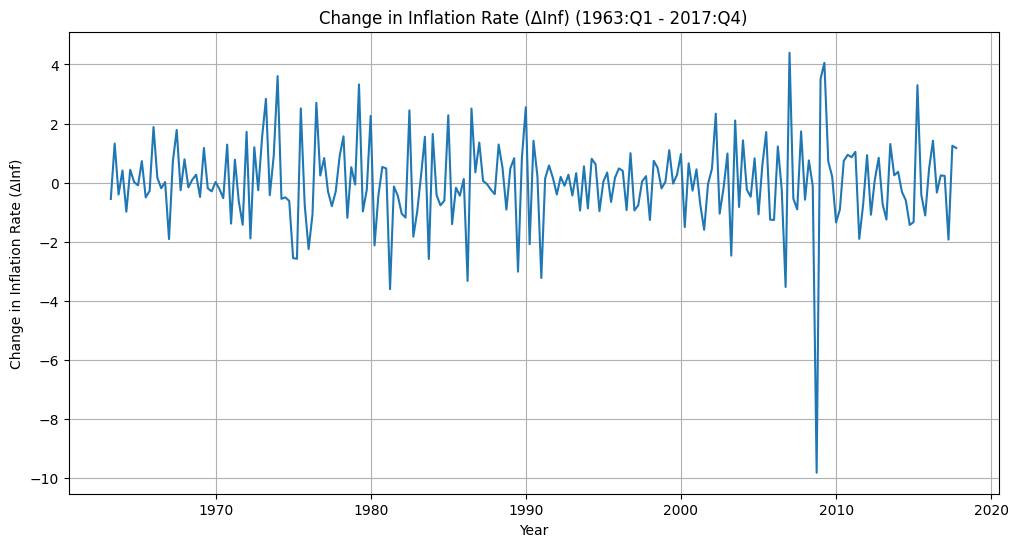

In [6]:
# Plotting the value of ΔInf from 1963:Q1 through 2017:Q4
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['freq'], df_filtered['Delta_Inf'])
plt.title('Change in Inflation Rate (ΔInf) (1963:Q1 - 2017:Q4)')
plt.xlabel('Year')
plt.ylabel('Change in Inflation Rate (ΔInf)')
plt.grid(True)
plt.show()

## Consistency with First Order Autocorrelation
### The first order autocorrelation of -0.246 suggests a moderate negative correlation between each quarter's inflation rate change and the change in the previous quarter. This indicates that if the inflation rate increased in one quarter (relative to its previous quarter), it is somewhat likely to decrease in the next quarter, and vice versa.



## c. i.

In [7]:
import statsmodels.api as sm

# Preparing the data set for OLS regression
# Dropping NaN values that were created due to differencing
df_filtered_ols = df_filtered.dropna()

# Independent variable (lagged ΔInf)
X = df_filtered_ols['Delta_Inf'].shift(1)

# Dependent variable (current ΔInf)
y = df_filtered_ols['Delta_Inf']

# Adding a constant to the model (intercept term)
X = sm.add_constant(X.dropna())

# OLS regression
ols_model = sm.OLS(y.iloc[1:], X.dropna()).fit()

# Displaying OLS regression results
ols_results = ols_model.summary()
ols_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Delta_Inf   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     13.97
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           0.000238
Time:                        22:23:18   Log-Likelihood:                -388.49
No. Observations:                 218   AIC:                             781.0
Df Residuals:                     216   BIC:                             787.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0101      0.098      0.103      0.918      -0.183       0.203
Delta_Inf     -0.2467      0.066     -3.738      0.000      -0.377      -0.117
==============================================================================
Omnibus:                       91.310   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              956.130
Skew:                          -1.294   Prob(JB):                    2.39e-208
Kurtosis:                      12.928   Cond. No.                         1.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Regression of $ΔInf_1$ on $ΔInf_{t−1}$
​

### The OLS regression results are as follows:
### Coefficient for
###- $ΔInf_{t−1}: -0.2467$
###- P-value for $ΔInf_{t−1}: 0.000$
###- R-squared: 0.061

### The negative coefficient (-0.2467) with a significant p-value suggests that knowing the change in inflation over the current quarter **does help predict** the change in inflation over the next quarter, **but the relationship is inverse.** A higher inflation change in one quarter tends to be followed by a lower change in the next quarter, and vice versa. However, the R-squared value is quite low, indicating that only a small portion of the variation in ΔInf_t is explained by its lagged value.

## c. ii.

In [8]:
from statsmodels.tsa.ar_model import AutoReg

# Estimating AR(2) model
ar2_model = AutoReg(df_filtered_ols['Delta_Inf'], lags=2).fit()

# Comparing AR(1) and AR(2) models using BIC
ar2_bic = ar2_model.bic
ar1_bic = AutoReg(df_filtered_ols['Delta_Inf'], lags=1).fit().bic
ar1_bic, ar2_bic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(793.125472881861, 777.1055461772713)

## The BIC for the AR(1) model is 793.13, and for the AR(2) model, it is 777.11. The lower BIC for the **AR(2) model suggests that it provides a better fit to the data compared to the AR(1) model.**

## c. iii.

In [9]:
# Estimating AR(p) models for p = 0, 1, …, 8 and finding the optimal lag length using BIC and AIC
bic_values = []
aic_values = []
for p in range(9):
    model = AutoReg(df_filtered_ols['Delta_Inf'], lags=p).fit()
    bic_values.append(model.bic)
    aic_values.append(model.aic)

optimal_bic_lag = bic_values.index(min(bic_values))
optimal_aic_lag = aic_values.index(min(aic_values))

# Displaying the results
ar2_model.summary(), ar1_bic, ar2_bic, optimal_bic_lag, optimal_aic_lag

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             AutoReg Model Results                             
 Dep. Variable:              Delta_Inf   No. Observations:                  219
 Model:                     AutoReg(2)   Log Likelihood                -377.793
 Method:               Conditional MLE   S.D. of innovations              1.380
 Date:                Thu, 21 Dec 2023   AIC                            763.586
 Time:                        22:23:18   BIC                            777.106
 Sample:                             2   HQIC                           769.047
                                   219                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
 --------------------------------------------------------------------------------
 const            0.0039      0.094      0.041      0.967      -0.180       0.187
 Delta_Inf.L1    -0.3163      0.065     -4.854      0.000      -

- ## The optimal lag length chosen by the BIC is 2.
- ## The optimal lag length chosen by the AIC is 8.

## c. iv, v

In [10]:
# Extracting the coefficients from the AR(2) model
ar2_params = ar2_model.params

# The last two observed changes in inflation
delta_inf_2017Q3 = df_filtered_ols['Delta_Inf'].iloc[-2]  # Second last observation
delta_inf_2017Q4 = df_filtered_ols['Delta_Inf'].iloc[-1]  # Last observation

# Define the last known inflation rate for 2017:Q4
inf_2017Q4 = df_filtered_ols['Inf'].iloc[-1]

# Manually predicting ΔInf for 2018:Q1 using the AR(2) model coefficients
delta_inf_2018Q1_pred_manual = ar2_params['const'] + ar2_params['Delta_Inf.L1'] * delta_inf_2017Q4 + ar2_params['Delta_Inf.L2'] * delta_inf_2017Q3

# Predicting the level of the inflation rate for 2018:Q1
inf_2018Q1_pred_manual = inf_2017Q4 + delta_inf_2018Q1_pred_manual

delta_inf_2018Q1_pred_manual, inf_2018Q1_pred_manual

(-0.720395695964839, 1.9644749014341305)

## Predictions
**iv. Change in Inflation ($ΔInf_{2018:Q1}$)**: The predicted change in inflation from 2017:Q4 to 2018:Q1 is approximately **-0.7204 (annualized percentage points)**.

**v. Level of Inflation Rate ($Infl_{2018:Q1}$)**: The predicted level of the inflation rate for 2018:Q1 is approximately **1.9645%**.

## d. i.

In [11]:
from statsmodels.tsa.stattools import adfuller

# Preparing the series for the ADF test
inf_series = df_filtered_ols['Inf']

# Applying the ADF test using Equation (15.32) with two lags of ΔInf
adf_test_result = adfuller(inf_series, maxlag=2, regression='n')  # 'nc' for no constant, no trend

# Extracting the test statistics and p-value
adf_statistic, p_value, used_lag, nobs, critical_values, icbest = adf_test_result

print(f"ADF Statistic: {adf_test_result[0]}")
print(f"P-value: {adf_test_result[1]}")
print(f"Number of lags used: {adf_test_result[2]}")
print(f"Number of Observations Used for the ADF Regression: {adf_test_result[3]}")
print(f"Critical Values: {adf_test_result[4]}")
print(f"ICBest (Information Criterion): {adf_test_result[-1]}")

ADF Statistic: -1.5134962270591081
P-value: 0.12209695348314764
Number of lags used: 2
Number of Observations Used for the ADF Regression: 216
Critical Values: {'1%': -2.5761686651234568, '5%': -1.9423125439187687, '10%': -1.6156460239642076}
ICBest (Information Criterion): 756.7821254196158


## d. ii.

## Equation 1.
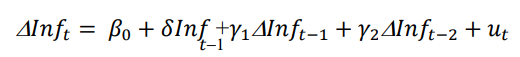

## Equation 2.
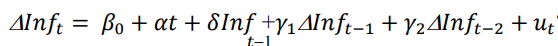

## Preference between Equations 1. and 2.
- ### Equation 1 is used when there is no expectation of a deterministic trend (no time trend) in the series.
- ### Equation 2 includes a time trend and is preferred if there's a reason to believe that the series has a deterministic trend component.
### The choice between these two depends on the nature of the Infl series. If we have reason to believe that Infl contains a deterministic trend, then Equation 2 would be more appropriate. Otherwise, Equation 1 is sufficient.

## d. iii. Number of Lags Used
### The choice of lags in an ADF test impacts the efficiency and power of the test. Too many lags can lead to overfitting and reduce the test's power, while too few lags might fail to capture the series' autocorrelation structure.
### The number of lags should ideally be determined based on criteria like the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC), or based on the significance of the lags in the model.
### Using two lags, as above, is a reasonable choice but can be further optimized based on the criteria mentioned above. But, as we found out AR(2) was a better fit than AR(1) using the criteria, hence, fewer lags would not provide better results.

## d. iv. Interpretation of ADF Test Results
- ### The ADF test's null hypothesis is that the series has a unit root (i.e., is non-stationary with a stochastic trend).
- ### In the test, the null hypothesis could not be rejected, indicating that the Infl series likely contains a unit root and is non-stationary. Since, at all 1%, 10%, and 5%, the critical values are not less than the critical values of ADF statistic.
### **However, failing to reject the null hypothesis does not mean it is true. It simply suggests that there is not enough evidence to conclude that the series is stationary.**
### In conclusion, based on the ADF test result, it is more likely that the Infl series is non-stationary and contains a unit root, although this is not definitively proven.

## e.

In [12]:
from statsmodels.regression.linear_model import OLS
import numpy as np
import pandas as pd
import statsmodels.api as sm

def calculate_ssr(data, model):
    """ Calculate the sum of squared residuals for the given model """
    model_fit = model.fit()
    residuals = model_fit.resid
    ssr = np.sum(residuals**2)
    return ssr

# Extracting the series for ΔInfl
delta_inf_series = df_filtered_ols['Delta_Inf'].dropna()

# Create lagged variables
lag1 = delta_inf_series.shift(1)
lag2 = delta_inf_series.shift(2)

# Combine lagged variables into a DataFrame
data = pd.DataFrame({'lag1': lag1, 'lag2': lag2, 'delta_inf_series': delta_inf_series})

# Drop rows with missing values
data = data.dropna()

# Estimating the AR(2) model for the entire sample
full_model = OLS(data['delta_inf_series'], sm.add_constant(data[['lag1', 'lag2']]))
full_ssr = calculate_ssr(data['delta_inf_series'], full_model)

# Setting up for the QLR test
n = len(delta_inf_series)
trim = 0.15
start_point = int(np.ceil(n * trim))
end_point = int(np.floor(n * (1 - trim)))
qlr_stats = []

# Iterating over potential break points
for break_point in range(start_point, end_point + 1):
    # Splitting the data
    data_first = data.iloc[:break_point]
    data_second = data.iloc[break_point:]

    # Estimating AR(2) models for each segment
    model_first = OLS(data_first['delta_inf_series'], sm.add_constant(data_first[['lag1', 'lag2']]))
    model_second = OLS(data_second['delta_inf_series'], sm.add_constant(data_second[['lag1', 'lag2']]))

    # Calculating SSR for each segment
    ssr_first = calculate_ssr(data_first['delta_inf_series'], model_first)
    ssr_second = calculate_ssr(data_second['delta_inf_series'], model_second)

    # QLR statistic
    qlr_stat = (full_ssr - (ssr_first + ssr_second)) / ((ssr_first + ssr_second) / (n - 2 * 2 - 1))  # 2 lags, 1 intercept
    qlr_stats.append((break_point, qlr_stat))

# Identifying the maximum QLR statistic
max_qlr_stat = max(qlr_stats, key=lambda x: x[1])

print(f"maximum QLR statistic: {max_qlr_stat[1]}")
print(f"found at: {max_qlr_stat[0]}")

maximum QLR statistic: 7.627353321454088
found at: 182


## 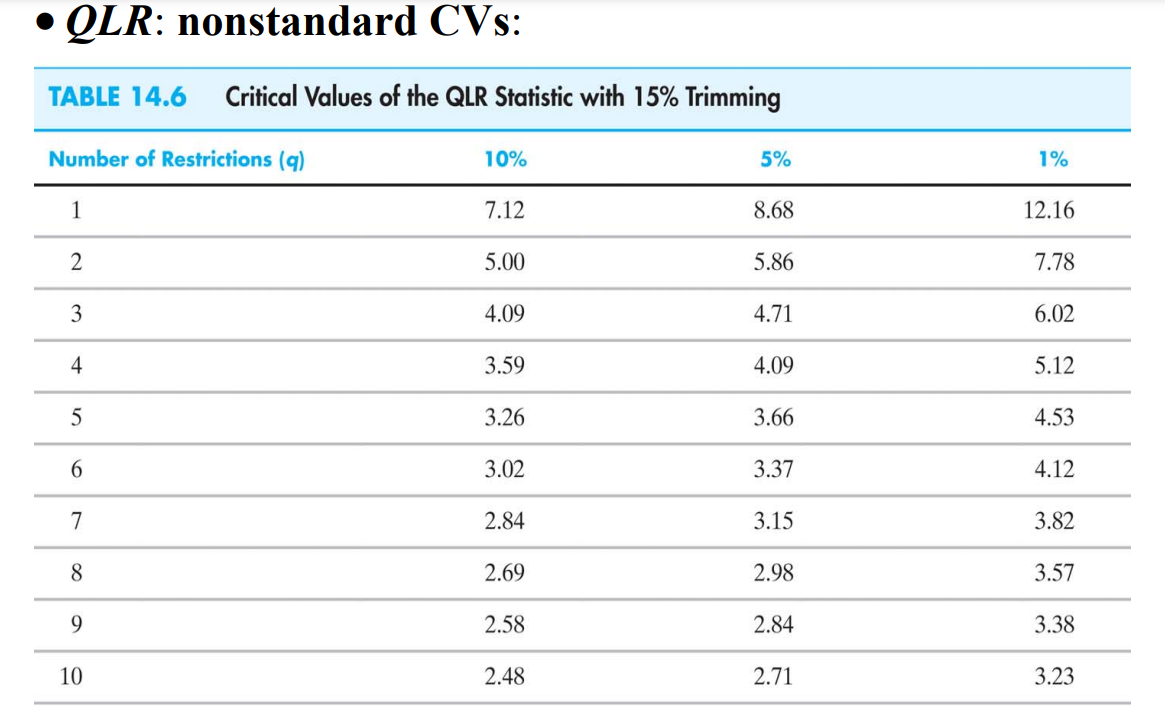

- ### **QLR Statistic:** A QLR statistic of 7.627 suggests that there is a significant difference in the sum of squared residuals (SSR) between the full-sample model and the segmented models at the 182nd observation. This indicates a potential structural break in the data around this point.

- ### **Stability of the AR(2) Model:** The presence of a significant structural break implies that the coefficients of the AR(2) model for ΔInfl may not be stable across the entire time period. The model parameters before and after the break point might differ, suggesting that a single AR(2) model may not adequately capture the dynamics of ΔInfl for the entire period.

- ### **Comparing to Critical Values:** To definitively conclude about the stability, the QLR statistic should be compared to the critical values from the relevant statistical distribution.
### Given that the maximum QLR statistic from the test is 7.627, we can compare this against the critical values from the table 14.6 above:
### For a test with one restriction (which is typical for a single breakpoint test in an AR(2) model):

  - ### At the 10% level, the critical value is 7.12.
  - ### At the 5% level, the critical value is 8.68.
  - ### At the 1% level, the critical value is 12.16.

- ### **Practical Implication:** If the AR(2) model is unstable, it means that the relationships captured by the model may change over time. In such cases, you might need to consider models that allow for changing coefficients or split the data into different periods based on the structural break for separate analyses.

## Conclusion:
### The QLR test indicates that there is evidence of a structural break in the AR(2) model for ΔInfl at the 10% significance level, but this evidence is not strong enough to reject the null hypothesis of coefficient stability at the 5% level. This suggests some instability in the model, although it is not highly significant at the more stringent 5% level.

# Task 2
## Time series used: SP500

## a.


In [14]:
import pandas as pd
sp500_data = pd.read_excel('/content/SP500WeekDays.xlsx')
sp500_data

,year,mom,day,sp,M,T,W,R,F
0,1980,1,2,-0.020196,0,0,1,0,0
1,1980,1,3,-0.005106,0,0,0,1,0
2,1980,1,4,0.012355,0,0,0,0,1
3,1980,1,7,0.002722,1,0,0,0,0
4,1980,1,8,0.020036,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
7314,2008,12,24,0.005781,0,0,1,0,0
7315,2008,12,26,0.005356,0,0,0,0,1
7316,2008,12,29,-0.003873,1,0,0,0,0
7317,2008,12,30,0.024407,0,1,0,0,0


In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Select data from the beginning of 2008 financial crisis
crisis_data = sp500_data[sp500_data['year'] >= 2008]

# Hill's Method
threshold = crisis_data['sp'].quantile(0.95)
exceedances = crisis_data[crisis_data['sp'] > threshold]['sp']
hill_estimator = len(exceedances) / exceedances.sum()

# Log-Log Rank-Size Regression
rank = np.arange(1, len(crisis_data) + 1)
survival_function = 1 - np.arange(1, len(crisis_data) + 1) / len(crisis_data)
log_rank = np.log(rank)
log_survival = np.log(survival_function)

X = sm.add_constant(log_rank)
model = sm.OLS(log_survival, X)
results = model.fit()
log_log_slope = results.params[1]
log_log_alpha = -1 / log_log_slope

# Print the results
print(f'Hill\'s Estimator (ita): {hill_estimator}')
print(f'Log-Log Rank-Size Regression (ita): {log_log_alpha}')

Hill's Estimator (ita): 16.592976831098817
Log-Log Rank-Size Regression (ita): 0.0


<ipython-input-15-1b560aeabf97>:17: RuntimeWarning: divide by zero encountered in log
  log_survival = np.log(survival_function)


## b.

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Number of bootstrap samples
num_bootstraps = 1000

# Arrays to store bootstrap estimates
hill_estimates = np.zeros(num_bootstraps)
log_log_estimates = np.zeros(num_bootstraps)

# Bootstrap procedure for Hill's Method
for i in range(num_bootstraps):
    bootstrap_sample = np.random.choice(exceedances, size=len(exceedances), replace=True)
    hill_estimates[i] = len(bootstrap_sample) / bootstrap_sample.sum()

# Bootstrap procedure for Log-Log Rank-Size Regression
for i in range(num_bootstraps):
    bootstrap_sample = crisis_data.sample(frac=1, replace=True)  # Resample with replacement
    rank = np.arange(1, len(bootstrap_sample) + 1)
    survival_function = 1 - rank / len(bootstrap_sample)
    log_rank = np.log(rank)
    log_survival = np.log(survival_function)

    X = sm.add_constant(log_rank)
    model = sm.OLS(log_survival, X)
    results = model.fit()
    log_log_slope = results.params[1]
    log_log_estimates[i] = -1 / log_log_slope

# Confidence intervals
hill_ci = np.percentile(hill_estimates, [2.5, 97.5])
log_log_ci = np.percentile(log_log_estimates, [2.5, 97.5])

# Print the results
print(f'Hill\'s Method Confidence Interval: {hill_ci}')
print(f'Log-Log Rank-Size Regression Confidence Interval: {log_log_ci}')

<ipython-input-16-26c6db5c14bb>:23: RuntimeWarning: divide by zero encountered in log
  log_survival = np.log(survival_function)


Hill's Method Confidence Interval: [13.59856365 20.63938677]
Log-Log Rank-Size Regression Confidence Interval: [0. 0.]


## c.

### A tail index in the range (2, 4) generally suggests finite variance. However, the Hill's estimator results seem to suggest a much heavier tail. This could be an indication that the variance of the return time series might be infinite or that the data might be better described by a distribution with a heavier tail than what is assumed in the (2, 4) interval.

## d.

In [17]:
import pandas as pd
import arch

# Assuming df is your DataFrame containing the return time series
returns = crisis_data['sp']

# Fit a GARCH(1, 1) model
model = arch.arch_model(returns, vol='Garch', p=1, q=1)
results = model.fit()

# Display the summary
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 57843307.44882408
Iteration:      2,   Func. Count:     17,   Neg. LLF: 43251344674.38187
Iteration:      3,   Func. Count:     28,   Neg. LLF: 184.5659777585086
Iteration:      4,   Func. Count:     35,   Neg. LLF: 653.7819193125297
Iteration:      5,   Func. Count:     44,   Neg. LLF: 930.4411924994461
Iteration:      6,   Func. Count:     53,   Neg. LLF: 8148.554426636973
Iteration:      7,   Func. Count:     59,   Neg. LLF: 101667235.6103745
Iteration:      8,   Func. Count:     65,   Neg. LLF: -577.3772122438775
Iteration:      9,   Func. Count:     71,   Neg. LLF: -635.267689588827
Iteration:     10,   Func. Count:     77,   Neg. LLF: -501.6029975900874
Iteration:     11,   Func. Count:     83,   Neg. LLF: -635.4642070750285
Iteration:     12,   Func. Count:     89,   Neg. LLF: -635.7871061131157
Iteration:     13,   Func. Count:     95,   Neg. LLF: -633.2336870146135
Iteration:     14,   Func. Count:    101,   Neg. LLF: -636.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006634. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


- ## Statistical Significance of GARCH Coefficients:
   - ### Both the ARCH coefficient (alpha[1]) and the GARCH coefficient (beta[1]) are highly statistically significant. This suggests that past squared returns and past conditional variances have a significant impact on the current volatility.
- ## Finiteness of Variance:

   - ### The estimated coefficients do not provide direct information about the finiteness of the variance. However, the fact that the GARCH model converges successfully and produces significant coefficients implies that the model captures time-varying volatility patterns in the return time series.

- ## Overall Model Fit:

   - ### The log-likelihood value is -636.008, and the AIC and BIC values are reported as well. These can be used for model comparison.

## In summary, the GARCH model results suggest that the return time series exhibits significant volatility clustering, with past squared returns and past conditional variances influencing the current volatility. The estimated coefficients do not provide direct information about the finiteness of the variance but indicate that the model captures relevant volatility dynamics in the data.

# Task 3

In [19]:
import pandas as pd
data = pd.read_excel("/content/us_macro_monthly1.xlsx")
data

,freq,CPI,EXUSUK,FEDFUNDS,GS1,GS10,INDPRO,PCED,TB3MS,UNRATE,WPU0561,PAYEMS,DJIA
0,1955-01-01,26.770,NaN,1.39,1.39,2.61,19.9437,NaN,1.22,4.9,12.6,49497,NaN
1,1955-02-01,26.820,NaN,1.29,1.57,2.65,20.1941,NaN,1.17,4.7,12.6,49644,NaN
2,1955-03-01,26.790,NaN,1.35,1.59,2.68,20.6669,NaN,1.28,4.6,12.6,49963,NaN
3,1955-04-01,26.790,NaN,1.43,1.75,2.75,20.9173,NaN,1.59,4.7,12.6,50247,NaN
4,1955-05-01,26.770,NaN,1.43,1.90,2.76,21.2510,NaN,1.45,4.3,12.6,50512,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2017-08-01,245.262,1.2952,1.16,1.23,2.21,104.5605,112.629,1.01,4.4,130.6,146949,21914.08
752,2017-09-01,246.392,1.3340,1.15,1.28,2.20,104.8195,113.077,1.03,4.2,134.9,146963,22173.41
753,2017-10-01,246.583,1.3202,1.15,1.40,2.36,106.5818,113.247,1.07,4.1,142.4,147234,23036.24
754,2017-11-01,247.411,1.3217,1.16,1.56,2.35,106.8643,113.481,1.23,4.1,158.7,147450,23557.93


In [20]:
import numpy as np

# Calculate the monthly rate of price inflation based on the CPI and PCED
data = data.dropna(subset=['CPI', 'PCED'])  # Removing rows where CPI or PCED is NaN

# Calculate the inflation rate for CPI and PCED
data['pi_CPI'] = 1200 * np.log(data['CPI'] / data['CPI'].shift(1))
data['pi_PCED'] = 1200 * np.log(data['PCED'] / data['PCED'].shift(1))

# Compute the difference between the CPI and PCED inflation rates
data['inflation_diff'] = data['pi_CPI'] - data['pi_PCED']

# Remove the NaN values that result from using the shift operation
data = data.dropna(subset=['pi_CPI', 'pi_PCED', 'inflation_diff'])

# Display the calculated inflation rates and their difference
data[['pi_CPI', 'pi_PCED', 'inflation_diff']].describe()

<ipython-input-20-fe897af59ac8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pi_CPI'] = 1200 * np.log(data['CPI'] / data['CPI'].shift(1))
<ipython-input-20-fe897af59ac8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pi_PCED'] = 1200 * np.log(data['PCED'] / data['PCED'].shift(1))
<ipython-input-20-fe897af59ac8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,pi_CPI,pi_PCED,inflation_diff
count,707.000000,707.000000,707.000000
mean,3.641457,3.212346,0.429111
std,3.770437,2.966422,1.650326
min,-21.436913,-13.652515,-7.784398
25%,1.540196,1.471986,-0.417894
50%,3.167622,2.718111,0.371339
75%,5.350924,4.633074,1.217103
max,21.525241,14.572231,8.631040


- ### The mean monthly rate of price inflation based on the CPI (pi_CPI) is approximately 3.64% (annualized).
- ### The mean monthly rate of price inflation based on the PCED (pi_PCED) is approximately 3.21% (annualized).
- ### The mean difference in inflation rates (inflation_diff) is approximately 0.43 percentage points (annualized).

### Constant term only regression

In [24]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson

# Perform the "constant-term-only" regression again to be explicit in the steps
X = add_constant(data['inflation_diff'] * 0)  # Adds a constant term with no other predictors
Y = data['inflation_diff']
model = OLS(Y, X).fit()

# Get the summary of the regression results
regression_summary = model.summary()

# Check for serial correlation using the Durbin-Watson test statistic.
# Durbin-Watson statistic ranges from 0 to 4 (2 indicates no serial correlation).
durbin_watson_statistic = durbin_watson(model.resid)

regression_summary, durbin_watson_statistic

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:         inflation_diff   R-squared:                      -0.000
 Model:                            OLS   Adj. R-squared:                 -0.000
 Method:                 Least Squares   F-statistic:                       nan
 Date:                Thu, 21 Dec 2023   Prob (F-statistic):                nan
 Time:                        22:34:26   Log-Likelihood:                -1356.9
 No. Observations:                 707   AIC:                             2716.
 Df Residuals:                     706   BIC:                             2720.
 Df Model:                           0                                         
 Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------------------

## The regression summary indicates a constant coefficient (the mean of the inflation rate difference) of approximately **0.4291 with a standard error of approximately 0.062**. The t-statistic for the constant is approximately 6.914, and it is statistically significant with a p-value near zero. This reaffirms the earlier inference that **the mean difference in inflation rates between CPI and PCED is statistically significant.**

## a.

In [29]:
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.sandwich_covariance import cov_hac

# the bandwidth
# We will use a commonly used rule of thumb for the bandwidth parameter: b = 0.75*T^(1/3)
T = len(data)
bandwidth = int(0.75*T**(1/3))

# Calculate the Newey-West HAC standard errors using the cov_hac function
nw_cov = cov_hac(model, nlags=bandwidth)

# Recalculate the OLS to get the regression results object
model = OLS(Y, X).fit(cov_type='HAC',cov_kwds={'maxlags':bandwidth})

# Extract the Newey-West standard error for the constant term
nw_se_mean = model.bse[0]

# Calculate the 95% confidence interval for µ using the Newey-West standard errors
z_score_95 = 1.96  # z-score for 95% confidence

# Calculate the mean inflation rate difference
mean_inflation_diff = data['inflation_diff'].mean()

# Recalculate the 95% confidence interval for µ using the Newey-West standard errors
lower_bound = mean_inflation_diff - z_score_95 * nw_se_mean
upper_bound = mean_inflation_diff + z_score_95 * nw_se_mean
bandwidth, nw_se_mean, (lower_bound, upper_bound)

(6, 0.07309037345271707, (0.2858537251539125, 0.5723679890885633))

## The Newey-West HAC standard errors have been calculated with a bandwidth parameter of 6, which is the integer part of $0.75\times T^{1/3}$ for the sample size $T$. Reference: Stock and Watson, Ch. 16

## The Newey-West standard error for the mean inflation rate difference is approximately 0.0731. Using this standard error, the 95% confidence interval for µ (the mean inflation rate difference) is approximately (0.2859, 0.5724) percentage points (annualized).

## This means we are 95% confident that the true mean difference in inflation rates between CPI and PCED lies within this interval, taking into account potential heteroskedasticity and autocorrelation in the residuals.

## b.

##The Newey-West estimator's consistency generally relies on the following assumptions:

- ### Correct Specification: The model must be correctly specified. That is, the mean function is linear, and there are no omitted variables that are both correlated with the included regressors and the error term.

- ### Stationarity: The data generating process should be stationary. This implies that the statistical properties of the system do not change over time and that the moments (mean, variance) do not depend on time.

- ### Finite Moments: The errors in the model should have finite second moments. In other words, the variance of the errors should be finite.

- ### Decay of Serial Correlation: The autocorrelation of the error terms should decline at a certain rate as the lag increases. Specifically, the sum of the absolute values of the autocovariances should be finite.

- ### No Perfect Multicollinearity: In the regression model, there should not be perfect multicollinearity among the independent variables.

## Considering that part (a) involves calculating a constant term only, some of these assumptions pertain to the nature of the data rather than the regression model's structure. Here is how these assumptions hold in the context of the exercise:

- ### Correct Specification: Since we are only estimating the mean difference, the model specification is minimal. However, this assumption would still require that the mean is the correct measure to use, which is reasonable in this context.

- ### Stationarity: The economic data typically have trends and may be subject to structural breaks. However, we are dealing with inflation rates, which are generally stationary processes as they represent growth rates. This assumption is likely to hold.

- ### Finite Moments: Economic data, particularly inflation rates, are generally assumed to have finite variances unless there are extreme circumstances, such as hyperinflation or deflation, which are not the case here.

- ### Decay of Serial Correlation: This is a key assumption for the Newey-West estimator. Since we have already detected serial correlation, using the Newey-West estimator is appropriate as it is designed to provide consistent estimates under such conditions.

- ### No Perfect Multicollinearity: In a constant-only model, multicollinearity is not an issue.

## Therefore, the assumptions necessary for the Newey-West standard errors to be consistent are likely to hold for our exercise. However, it is essential to understand the limitations of these assumptions and that they provide a theoretical underpinning that may not perfectly reflect all empirical situations.





